# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10:


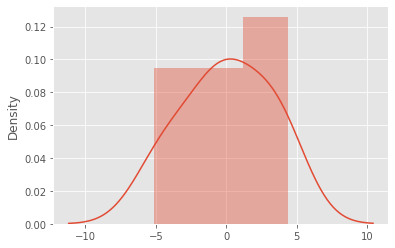

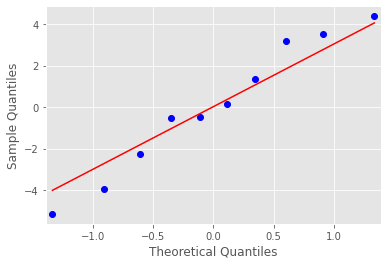

x_50:


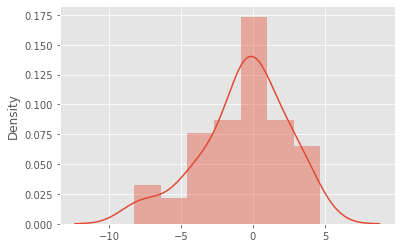

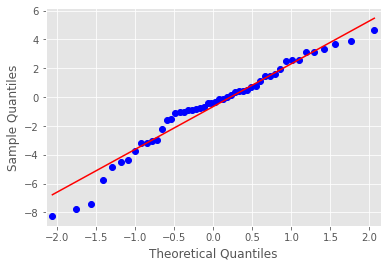

x_100:


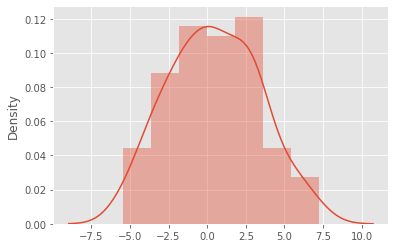

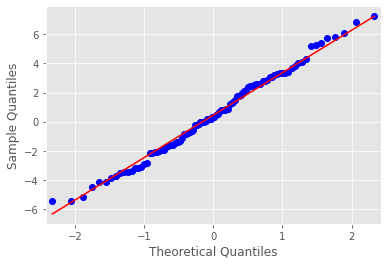

x_1000:


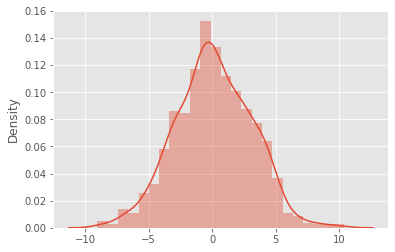

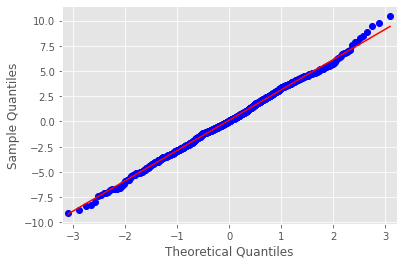

In [2]:
# Plot histograms and Q-Q plots for above datasets

dist_labels = ['x_10', 'x_50', 'x_100', 'x_1000']
dists = [x_10, x_50, x_100, x_1000]

for i in range(len(dists)):
    print(f'{dist_labels[i]}:')
    sns.distplot(dists[i])
    sm.qqplot(dists[i], line='s')
    plt.show()
    

In [3]:
# Your comments here 

# The histograms give information about how shape / skew / etc, overall how the distribution is not exactly normal

# The q-q plots give a better picture of when the distributions *are* normal;
# The x_10 and x_50 are a little funky in the histograms, but the q-q's still lead you to say they are mostly normal

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

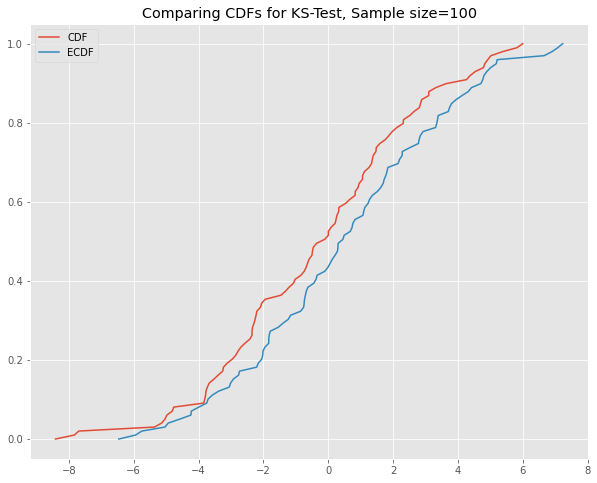

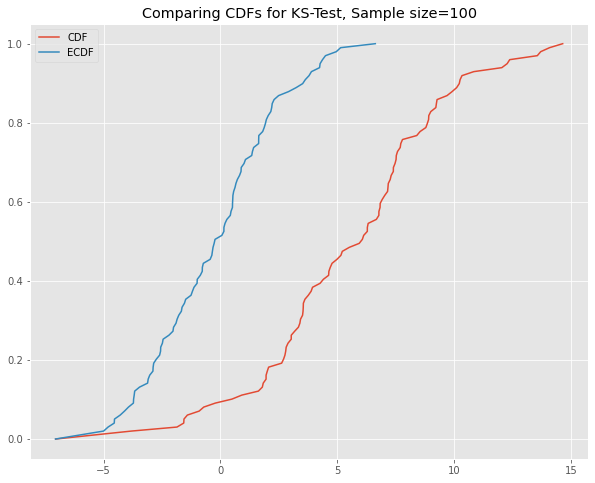

In [4]:
# You code here 

def ks_plot(data):
    plt.figure(figsize=(10,8))
    n = len(data)
    plt.plot(np.sort(data), np.linspace(0, 1, n), label='CDF')
    plt.plot(np.sort(stats.norm.rvs(0,3,n)), np.linspace(0, 1, n), label='ECDF')
    
    plt.title(f"Comparing CDFs for KS-Test, Sample size={n}")
    plt.legend()
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

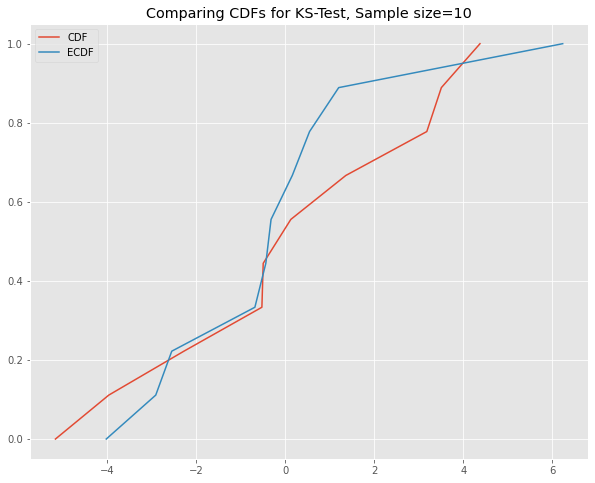

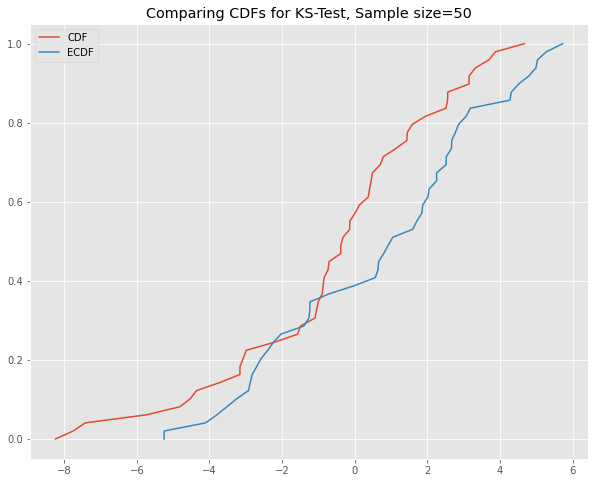

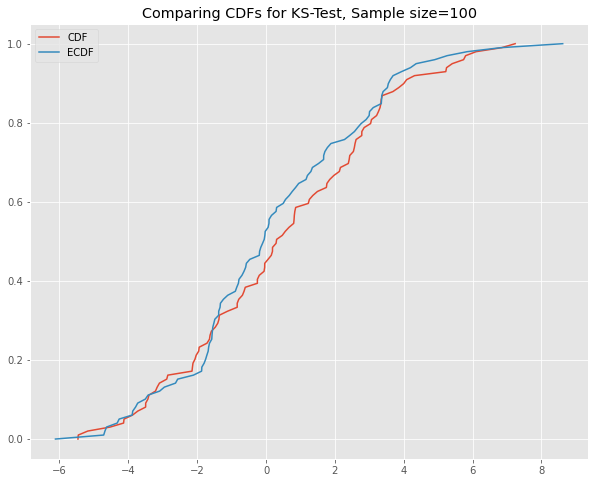

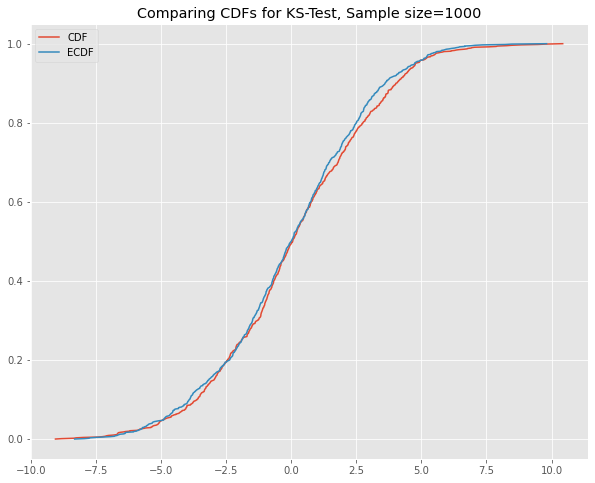

In [5]:
for data in dists:
    ks_plot(data)

In [6]:
# Your comments here

# We can estimate and see lower and lower d values as sample size increases
# n=10 is very noisy and messy
# n=50+ we can see normality much more clearly

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [21]:
# Perform K-S test

np.random.seed(999)
for data in dists:
    print (stats.kstest(data, 'norm', args=(0,3)))
# Your code here 

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.1555526310847246, pvalue=0.9392825632432431)
KstestResult(statistic=0.1162505032680341, pvalue=0.47367117584147256)
KstestResult(statistic=0.09727824613595892, pvalue=0.2817027963546165)
KstestResult(statistic=0.03837953693151491, pvalue=0.1024000107823223)


In [22]:
# Your comments here

# We cannot reject the null in any case, all p-values are much greater than 0.05

# This makes sense, as the data was generated from a normal distribution

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [60]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution

print(stats.kstest(x_uni, 'uniform'))
print(stats.kstest(x_uni, 'norm', args=(0,3)))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.027830451395371658, pvalue=0.41334078354683923)
KstestResult(statistic=0.5000652882175392, pvalue=9.172262981143251e-232)


In [61]:
# Your comments here 

# Comparing against a uniform distribution, p is much greater than 0.05, so we cannot reject the null,
# and say that the sample is a uniform distribution

# Comparing against a normal distribution, p is virtually 0, so we can reject the null,
# and say that the sample is not normally distributed

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

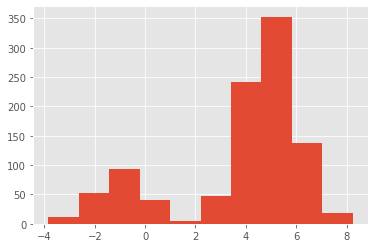

In [77]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.2 * N)), np.random.normal(5, 1, int(0.8 * N))))
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

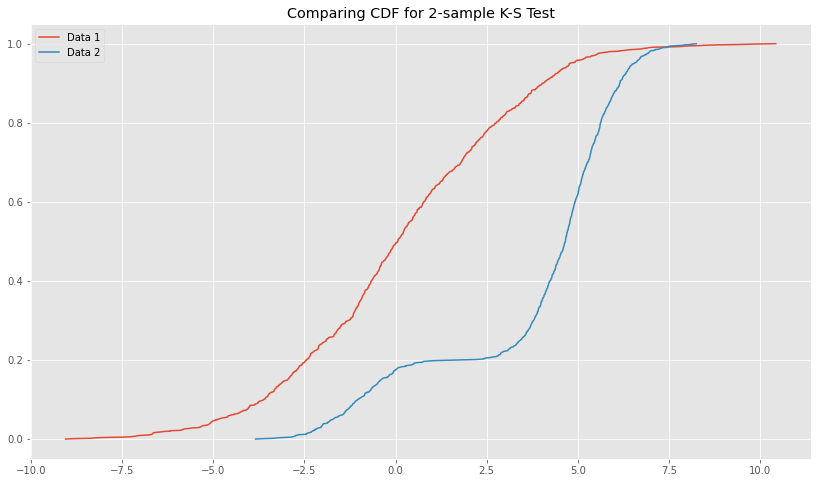

In [80]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    plt.figure(figsize=(14,8))
    n = len(data_1)
    ys = np.linspace(0, 1, n)
    plt.plot(np.sort(data_1), ys, label='Data 1')
    plt.plot(np.sort(data_2), ys, label='Data 2')
    plt.title("Comparing CDF for 2-sample K-S Test")
    plt.legend()
    

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi)


In [82]:
# You comments here

# It's clear that data_1 is normal, and data_2 is not normal; this makes sense,
# as data_2 was generated from bimodal data
# We can predict a high d value, and a very low p-value

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [83]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi)
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

KstestResult(statistic=0.605, pvalue=9.050350483119254e-171)

In [84]:
# Your comments here 

# As expected, a high d value, and a very low p-value, thus we can say that they
# are not both distributed the same (rejecting the null)

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 